<h1><center>Data Analyst Capstone Project 3: Examining Factors of Heart Attacks</center></h1>
<hr>
Submitted by: Yanda Sebega <br>
Date: 28-July-2022 <br>
Module: Data Analyst Capstone Project <br>
Institution: Simplilearn Solutions <br>


In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

<h3><u>Importing, Understanding, and Inspecting Data</u></h3>

<h4>1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc. </h4>

In [2]:
# Import data
data = pd.read_excel('data.xlsx')

In [3]:
# Structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# check the first rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Check for missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The method 'data.isna().sum()' indicates zeroes in all columns. This means there is no missing values in any of the columms.

In [6]:
# Check for Duplicates
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


By default, the duplicated function keep first and populate the subsequent duplicates.

<h4>2. Based on the findings from the previous question, remove duplicates (if any) and 
treat missing values using an appropriate strategy. </h4>

In [7]:
# Remove duplicates. In the example above, the record with index 164 is duplicate.
data = data.drop(data.index[164])

In [8]:
# Recheck for duplicates...
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


<h4>3. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and 
the spread of the data overall.</h4>

In [9]:
pd.set_option('precision', 2)
# Preliminary statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.42,9.05,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.68,0.47,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.96,1.03,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.60,17.56,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.50,51.75,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.15,0.36,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.53,0.53,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.57,22.90,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.33,0.47,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.04,1.16,0.0,0.00,0.8,1.60,6.2


In [10]:
#EXPLAIN THE CENTRAL TENDENCY...STD...HOW CENTERED IS DATA.

<h3><u>Performing EDA</u></h3>

<h4>4. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. 
For example: count plot.</h4>

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
categories = {'sex': data['sex'].unique(),
 'exang': data['exang'].unique(),
 'ca':    data['ca'].unique(),
 'thal':  data['thal'].unique()}

In [13]:
categories

{'sex': array([1, 0], dtype=int64),
 'exang': array([0, 1], dtype=int64),
 'ca': array([0, 2, 1, 3, 4], dtype=int64),
 'thal': array([1, 2, 3, 0], dtype=int64)}

In [14]:
categoricals = ['sex', 'exang', 'ca', 'thal']

<h4>5. Study the occurrence of CVD across different ages.</h4>

In [15]:
data['age'].min()

29

In [16]:
data['age'].max()

77

In [17]:
data['age_bins'] = pd.cut(x=data['age'], bins=[20, 29, 39, 49, 59, 69, 79])

In [18]:
CVD = data[data.target==1]

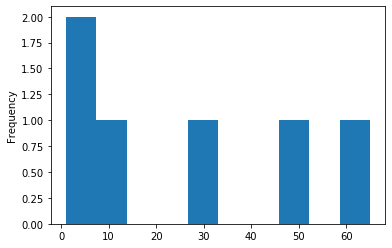

In [19]:
CVD['age_bins'].value_counts().plot(kind='hist')

<h4>6. Can we detect heart attack based on anomalies in resting blood pressure of the patient?</h4>

In [20]:
# detection outliers
# Quartiles---
q1=data['trestbps'].quantile(0.25)
q3=data['trestbps'].quantile(0.75)
iqr=q3-q1

# Define the lower and upper bounds
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Get data outside of the lower and upper bounds
outliers = data[~data['trestbps'].between(lower_bound, upper_bound)]

In [21]:
# Numbers of outliers
len(outliers)

9

In [22]:
# Anomalies in resting blood pressure with target = 1 
outliers[outliers.target==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,"(49, 59]"
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,"(49, 59]"
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1,"(59, 69]"


In [23]:
# Anomalies in resting blood pressure with target = 0
outliers[outliers.target==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,"(59, 69]"
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,"(49, 59]"
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,"(49, 59]"
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,"(49, 59]"
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0,"(59, 69]"
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0,"(49, 59]"


Out of 9 anamolies, only 3 patients (anomalies) have had heart attack in resting blood pressure. 
The proportion of positive cases is 3/9*100. That is 33.3%.

<h4>7. Study the composition of overall patients w.r.t . gender.</h4>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


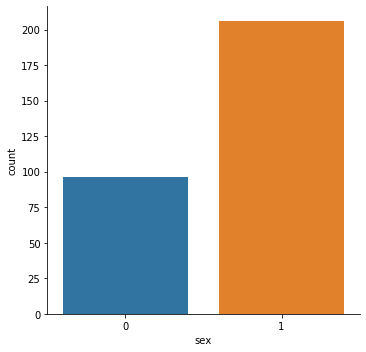

In [24]:
# 1 = male & 0 = Female
sns.factorplot('sex', data=data, kind='count')

The histogram suggests that men are more susceptible to heart than women.

<h3><u>Performing EDA and Modeling</u></h3>

<h4>1. Describe the relationship between cholesterol levels and our target variable.</h4>

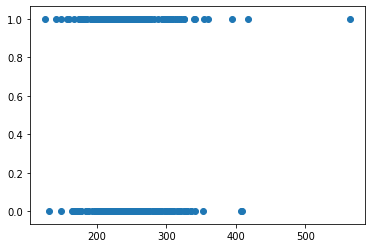

In [25]:
plt.scatter(data.chol, data.target)

Cholestorol play a major part in heart attacks.

<h4>2. What can be concluded about the relationship between peak exercising and occurrence of heart attack?</h4>

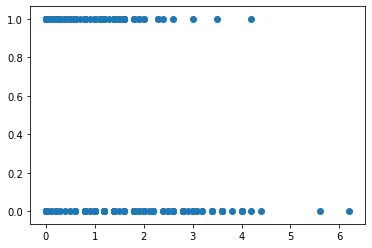

In [26]:
plt.scatter(data.oldpeak, data.target)

Peak exercising contributes in healthy behavior, thus, reducing occurence of heart attack.

<h4>3. Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?</h4>

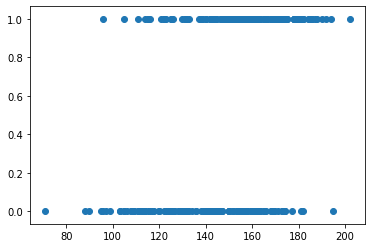

In [27]:
plt.scatter(data.thalach, data.target)

Thalassemia is a majar cause of CVD. The higher the thalassemia, the probably of CVD approaches 1.

<h4>4. Use a pair plot to understand the relationship between all the given variables.</h4>

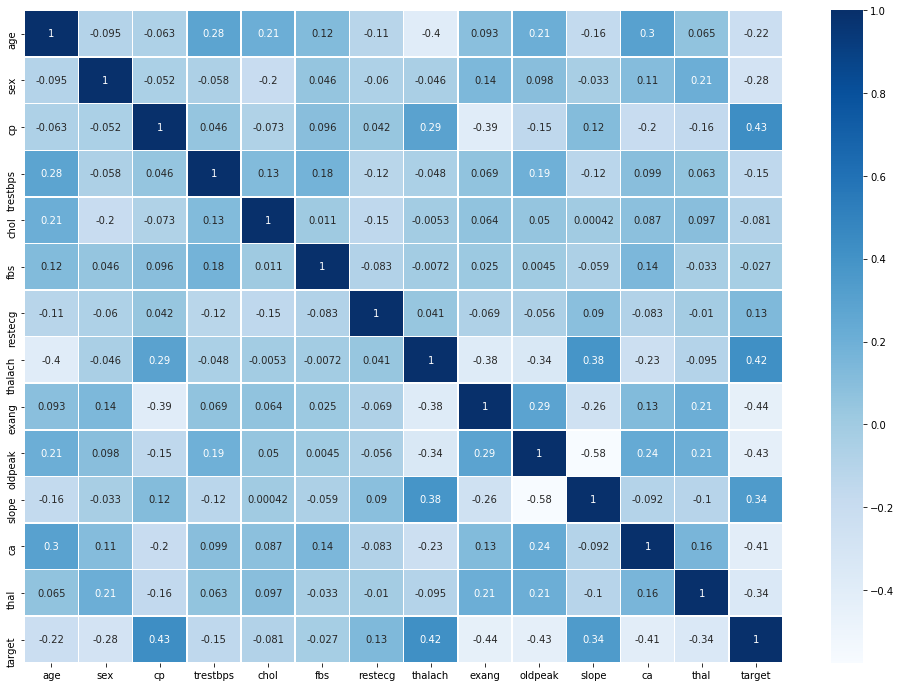

In [28]:
plt.rcParams['figure.figsize'] = (17, 12)
sns.heatmap(data.corr(), annot = True, linewidths=.5, cmap="Blues")

For a positive or negative corellation, the value between two variables has to approach 1 or -1 respectively. 
Most of the variables are not correlated.

<h4>5. Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.</h4>

In [29]:
# Separate the target from the indepedant variables
X=data.drop(columns=['target', 'age_bins'])
y=data.target

In [30]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=33)

In [31]:
# Perform logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
# Predict the outcome for test data
y_pred = logistic_regression.predict(X_test)

In [33]:
# Validate the results using confusion matrix
confusion_matrix(y_test, y_pred)

array([[28,  7],
       [ 2, 24]], dtype=int64)

In [34]:
accuracy_score(y_test, y_pred)

0.8524590163934426

We obtain an accuracy of 85%. The suggestion is turn to an ensemble model such as random forest or neural network to get the best 
hypothesis that would better represent the data.

<h3><u>Dashboarding</u></h3>

<h4>6. Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs. a Healthy person.</h4>

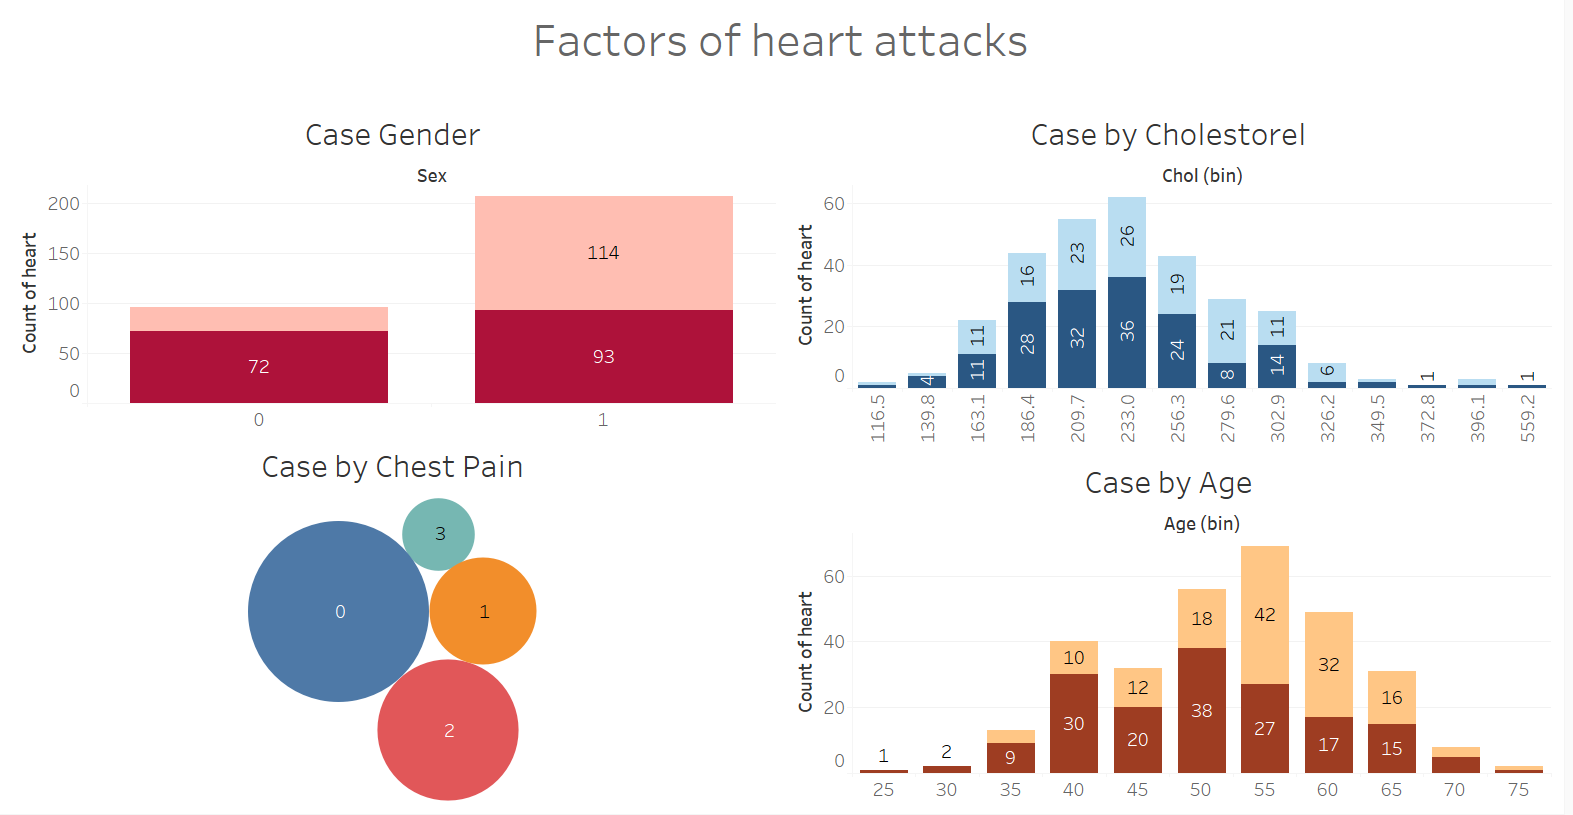